#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load error npys

In [2]:
rndm_wave = np.load('errors_list_random_wave_recon.npy')
rndm_flip = np.load('errors_list_random_flipflop.npy')
rndm_mnist = np.load('errors_list_random_seq_mnist.npy')

tppb_wave = np.load('errors_list_topprob_wave_recon.npy')
tppb_flip = np.load('errors_list_topprob_flipflop.npy')
tppb_mnist = np.load('errors_list_topprob_seq_mnist.npy')

#### Means and deviations

In [10]:
mean_mnist_rndm = np.mean(rndm_mnist)
mean_mnist_tppb = np.mean(tppb_mnist)

mean_wave_rndm = np.mean(rndm_wave)
mean_wave_tppb = np.mean(tppb_wave)

mean_flip_rndm = np.mean(rndm_flip)
mean_flip_tppb = np.mean(tppb_flip)

In [11]:
dev_mnist_rndm = np.std(rndm_mnist)
dev_mnist_tppb = np.std(tppb_mnist)

dev_wave_rndm = np.var(rndm_wave)
dev_wave_tppb = np.var(tppb_wave)

dev_flip_rndm = np.var(rndm_flip)
dev_flip_tppb = np.var(tppb_flip)

In [12]:
categories = ['Flip-flop', 'Wave reconstruction', 'Sequential MNIST']
group_labels = ['Top-prob Pruning', 'Random Pruning']

means1 = [mean_flip_rndm, mean_wave_rndm, mean_mnist_rndm]  # Mean values for group 1
devs1 = [dev_flip_rndm, dev_wave_rndm, dev_mnist_rndm]    # Standard deviations or variances for group 1

means2 = [mean_flip_tppb, mean_wave_tppb, mean_mnist_tppb]  # Mean values for group 2
devs2 = [dev_flip_tppb, dev_wave_tppb, dev_mnist_tppb]  # Standard deviations or variances for group 2

# Calculate error bars
error1 = [0.5 * d for d in devs1]
error2 = [0.5 * d for d in devs2]

bar_width = 0.25

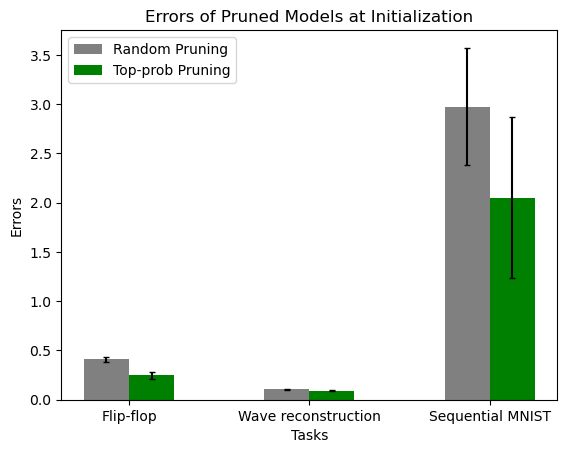

In [13]:
# Set the positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Plot grouped bar plot
fwarm = plt.figure()
plt.bar(r1, means1, yerr=error1, capsize=2, width=bar_width, label='Random Pruning', color='grey')
plt.bar(r2, means2, yerr=error2, capsize=2, width=bar_width, label='Top-prob Pruning', color='g')

# Add xticks on the middle of the group bars
plt.xlabel('Tasks')
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories)

# Add labels and title
plt.ylabel('Errors')
plt.title('Errors of Pruned Models at Initialization')

# Add legend
plt.legend()

# Show plot
plt.show()